**Alice, Ethan, Cole**

Spring 2020

CS 443: Computational Neuroscience

Project 4: Motion estimation

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from motion import MotionNet,KernelParams, LayerParams, HGateParams
from random_dot_stimulus import make_random_dot_stimulus
from net_plots import vector_sum_plot


plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Extensions

### 1. Additional visualizations

Neural network simulations with many areas and dimensions (space, motion direction, etc) present challenges to interpreting and visualizing the dynamics. Extensions like the following ideas are aimed to give us a better picture of the network's operation.

#### Needle plot

- Visualize the activity of ALL direction cells at ALL spatial positions with a needle plot. For each position (x, y), draw line segments (no arrowheads) coming out of (x,y) aligned each of the 8 preferred directions (e.g. for rightward motion, line sticks to the right, for up-and-right motion line sticks +45 deg, etc). The length is proportioonal to the cell activity. Do whatever normalization to make things look good/helpful. Make your plot show activations over time.

#### Mean activity plots

- Plot the mean direction activity across space for each area.

#### Better vector sum plots

- Superimpose the motion vectors onto of the input dot patterns so that you can see the correspondance.

In [31]:
from random_dot_stimulus import make_random_dot_stimulus
from net_plots import plot_act_image_single
from net_plots import plot_act_image_grid
from net_plots import vector_sum_plot
from net_plots import vector_sum_plot_and_input

##### sumperimpose the motion vectors onto the input plot

In [20]:
# a noise-free rightward motion RDK video with all 6 network layers, superimposed with the vector sum plot

np.random.seed(0)
n_frames = 30

right_motion = make_random_dot_stimulus(n_frames, dir_rc=(0, 1))

# Define parameters
lvl1_params = LayerParams(tau=1, A=1)
lvl1_hgate_params = HGateParams(tau=1, K=50)
lvl2_inter_params = LayerParams(tau=1, excit_g=10, inhib_g=40)
lvl2_params = LayerParams(tau=4, excit_g=10, inhib_g=40, output_thres=0.2)
lvl3_params = LayerParams(tau=0.5, output_thres=0.002) 
lvl3_excit_ker_params = KernelParams(sigma=(2, 0.5), sz=(13, 13), gain=25)
lvl4_params = LayerParams(tau=5, C=0.5)
lvl4_excit_ker_params = KernelParams(sigma=(3, 1), sz=(19, 19), gain=5)
lvl4_inhib_ker_params = KernelParams(sigma=4, sz=(25, 25), gain=5)
lvl6_params = LayerParams(tau=5, C=0.5, excit_g=2)
lvl6_inhib_ker_params = KernelParams(sigma=8, sz=(51, 51), gain=1)
lvl5_params = LayerParams(tau=5, C=0.5)
lvl5_excit_ker_params = KernelParams(sigma=(10, 3), sz=(51, 51), gain=2)


# Simulate net
net_vec = MotionNet(dt=0.1, 
                n_dirs=8, 
                lvl1_params=lvl1_params, 
                lv1_hgate_params=lvl1_hgate_params, 
                lvl2_inter_params=lvl2_inter_params, 
                lvl2_params=lvl2_params,
                lvl3_excit_ker_params = lvl3_excit_ker_params,
                lvl3_params = lvl3_params, 
                lvl4_params=lvl4_params, 
                lvl4_excit_ker_params = lvl4_excit_ker_params, 
                lvl4_inhib_ker_params = lvl4_inhib_ker_params,
                lvl5_params = lvl5_params,
                lvl5_excit_ker_params = lvl5_excit_ker_params,
                lvl6_params = lvl6_params,
                lvl6_inhib_ker_params = lvl6_inhib_ker_params)
net_vec.simulate(left_motion)

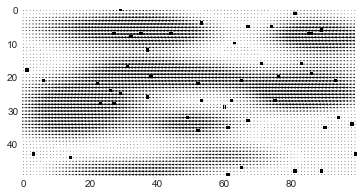

In [30]:
vector_sum_plot_and_input(act=net_vec.mstd_out, input=right_motion)

As shown in the above plot, the dots are moving in the direction the vector plot is pointing. The correspondence looks pretty cool. 

### 3. Additional RDKs

- Analyze/simulate your network with RDKs with different movement directions, changing directions, two simultaneous directions (called transparent motion), etc...lots of possibilities.

##### Simulate a noise-free lefttward motion RDK video with all 6 network layers.

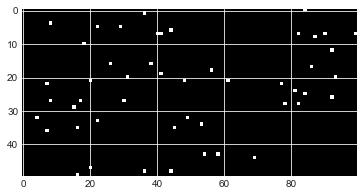

In [4]:
np.random.seed(0)
n_frames = 15
# make leftward motion video
left_motion = make_random_dot_stimulus(n_frames, dir_rc=(0, -1))
plot_act_image_single(left_motion)

In [5]:
# Define parameters
lvl1_params = LayerParams(tau=1, A=1)
lvl1_hgate_params = HGateParams(tau=1, K=50)
lvl2_inter_params = LayerParams(tau=1, excit_g=10, inhib_g=40)
lvl2_params = LayerParams(tau=4, excit_g=10, inhib_g=40, output_thres=0.2)
lvl3_params = LayerParams(tau=0.5, output_thres=0.002) 
lvl3_excit_ker_params = KernelParams(sigma=(2, 0.5), sz=(13, 13), gain=25)

lvl4_params = LayerParams(tau=5, C=0.5)
lvl4_excit_ker_params = KernelParams(sigma=(3, 1), sz=(19, 19), gain=5)
lvl4_inhib_ker_params = KernelParams(sigma=4, sz=(25, 25), gain=5)
# lvl5_params = LayerParams(tau=.5)
# lvl5_excit_ker_params = KernelParams(sigma=(2,0.5), sz=(52,52), gain=25)
# lvl6_params = LayerParams(tau=5, output_thres=0.002)
# lvl6_inhib_ker_params= KernelParams(sigma=4, sz=(52,52), gain = 5)

lvl6_params = LayerParams(tau=5, C=0.5, excit_g=2)
lvl6_inhib_ker_params = KernelParams(sigma=8, sz=(51, 51), gain=1)
lvl5_params = LayerParams(tau=5, C=0.5)
lvl5_excit_ker_params = KernelParams(sigma=(10, 3), sz=(51, 51), gain=2)


# Simulate net
net = MotionNet(dt=0.1, 
                n_dirs=8, 
                lvl1_params=lvl1_params, 
                lv1_hgate_params=lvl1_hgate_params, 
                lvl2_inter_params=lvl2_inter_params, 
                lvl2_params=lvl2_params,
                lvl3_excit_ker_params = lvl3_excit_ker_params,
                lvl3_params = lvl3_params, 
                lvl4_params=lvl4_params, 
                lvl4_excit_ker_params = lvl4_excit_ker_params, 
                lvl4_inhib_ker_params = lvl4_inhib_ker_params,
                lvl5_params = lvl5_params,
                lvl5_excit_ker_params = lvl5_excit_ker_params,
                lvl6_params = lvl6_params,
                lvl6_inhib_ker_params = lvl6_inhib_ker_params)
net.simulate(left_motion)

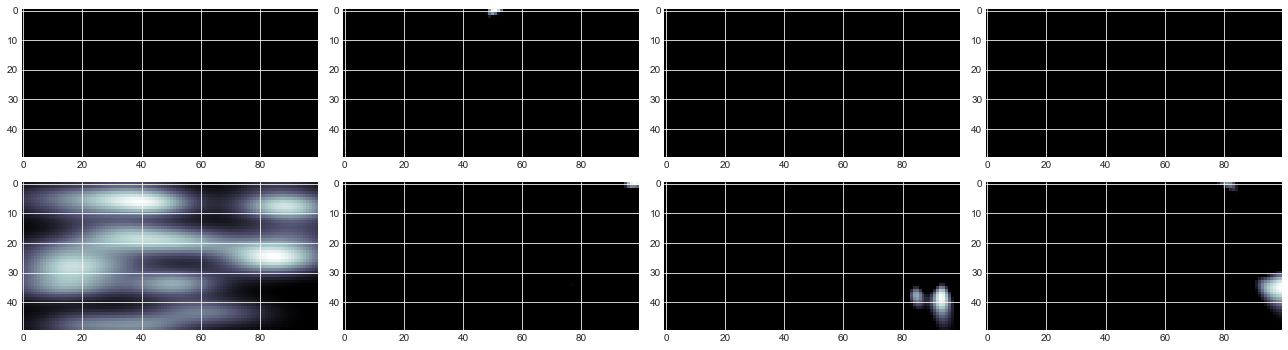

In [7]:
plot_act_image_grid(net.mstd_out[::5], n_rows=2, n_cols=4, pause=.00001, cmap='bone', figSz=(18, 9))

In [8]:
print(f'Your decoded evidence for each direction at the end of the simulation is\n{net.decode_direction(net.mstd_cells, -1)}')

Your decoded evidence for each direction at the end of the simulation is
[0.    0.    0.    0.    1.802 0.    0.001 0.002]


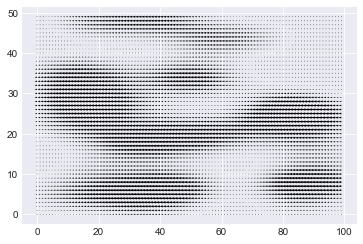

In [10]:
vector_sum_plot(net.mstd_out, figSz=(18, 9), pause=0.01)

##### Simulate a noisy (uncorrelated frame-to-frame noise) lefttward motion RDK video with all 6 network layers

In [11]:
np.random.seed(0)
left_motion20 = make_random_dot_stimulus(n_frames=10, dir_rc=(0, -1), noise_prop=.2)



# Define parameters
lvl1_params = LayerParams(tau=1, A=1)
lvl1_hgate_params = HGateParams(tau=1, K=50)
lvl2_inter_params = LayerParams(tau=1, excit_g=10, inhib_g=40)
lvl2_params = LayerParams(tau=4, excit_g=10, inhib_g=40, output_thres=0.2)
lvl3_params = LayerParams(tau=0.5, output_thres=0.002) 
lvl3_excit_ker_params = KernelParams(sigma=(2, 0.5), sz=(13, 13), gain=25)

lvl4_params = LayerParams(tau=5, C=0.5)
lvl4_excit_ker_params = KernelParams(sigma=(3, 1), sz=(19, 19), gain=5)
lvl4_inhib_ker_params = KernelParams(sigma=4, sz=(25, 25), gain=5)
# lvl5_params = LayerParams(tau=.5)
# lvl5_excit_ker_params = KernelParams(sigma=(2,0.5), sz=(52,52), gain=25)
# lvl6_params = LayerParams(tau=5, output_thres=0.002)
# lvl6_inhib_ker_params= KernelParams(sigma=4, sz=(52,52), gain = 5)

lvl6_params = LayerParams(tau=5, C=0.5, excit_g=2)
lvl6_inhib_ker_params = KernelParams(sigma=8, sz=(51, 51), gain=1)
lvl5_params = LayerParams(tau=5, C=0.5)
lvl5_excit_ker_params = KernelParams(sigma=(10, 3), sz=(51, 51), gain=2)


# Simulate net
net2 = MotionNet(dt=0.1, 
                n_dirs=8, 
                lvl1_params=lvl1_params, 
                lv1_hgate_params=lvl1_hgate_params, 
                lvl2_inter_params=lvl2_inter_params, 
                lvl2_params=lvl2_params,
                lvl3_excit_ker_params = lvl3_excit_ker_params,
                lvl3_params = lvl3_params, 
                lvl4_params=lvl4_params, 
                lvl4_excit_ker_params = lvl4_excit_ker_params, 
                lvl4_inhib_ker_params = lvl4_inhib_ker_params,
                lvl5_params = lvl5_params,
                lvl5_excit_ker_params = lvl5_excit_ker_params,
                lvl6_params = lvl6_params,
                lvl6_inhib_ker_params = lvl6_inhib_ker_params)
net2.simulate(left_motion20)

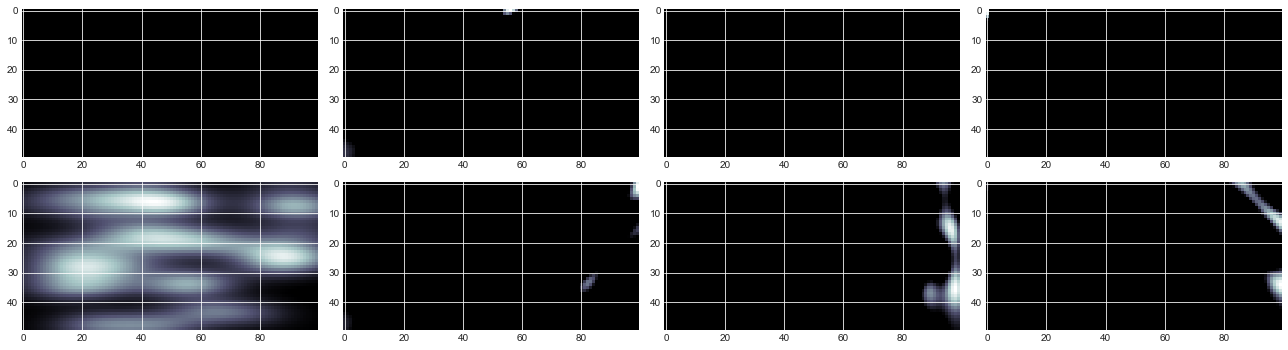

In [12]:
plot_act_image_grid(net2.mstd_out[::5], n_rows=2, n_cols=4, pause=.00001, cmap='bone', figSz=(18, 9))

In [13]:
print(f'Your decoded evidence for each direction at the end of the simulation is\n{net2.decode_direction(net.mstd_cells, -1)}')

Your decoded evidence for each direction at the end of the simulation is
[0.    0.    0.    0.    1.802 0.    0.001 0.002]


##### The results looks as expected, opposite to the result we get from the rightward motion. 